# **Proyecto I- Parte IV (Core)**

### **Análisis y Predicción de Ventas en una Tienda de Retail**

### **Continuar desde la Parte III**
* Asegúrate de tener el repositorio de GitHub clonado localmente y el dataset ya limpiado y preparado desde la Parte III.

In [1]:
# Importamos librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive # Importamos la libreria para montar Google Drive

# Montar Google Drive
drive.mount('/content/drive')

def cargar_datos(ruta_archivo):
    # Carga los datos del archivo CSV utilizando Pandas
    datos = pd.read_csv(ruta_archivo)
    return datos

# Define la ruta del archivo fuera de la función
ruta_archivo =  "/content/drive/MyDrive/Sonda-Skillnets/retail_sales_dataset.csv"

Mounted at /content/drive


In [2]:
# Llama a la función para cargar los datos y asigna el resultado a la variable 'df'
df = cargar_datos(ruta_archivo)

In [3]:
# Despliego un conjunto de registros para validar la conexión al Drive
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
831,832,2023-09-11,CUST832,Male,47,Beauty,4,500,2000
213,214,2023-12-10,CUST214,Male,20,Beauty,2,30,60
231,232,2023-02-06,CUST232,Female,43,Beauty,1,25,25
132,133,2023-02-16,CUST133,Male,20,Electronics,3,300,900
155,156,2023-11-25,CUST156,Female,43,Clothing,4,25,100


### **Análisis Descriptivo y Visualización**
* Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
* Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
* Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.
* Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.
* Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.

**Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.**

In [4]:
# Calcula estadísticas descriptivas básicas para comprender mejor las características de los datos.
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.**

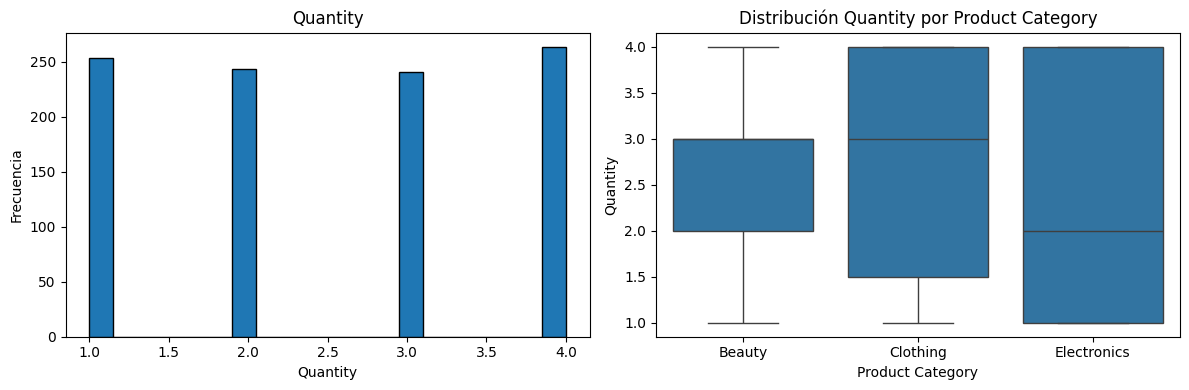

In [5]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
# Graficaré Quantity
# Tamaño del lienzo (ancho x alto).
plt.figure(figsize=(12, 4))

# Primer gráfico
plt.subplot(1, 2, 1)
# Creo histograma de Quantity
plt.hist(df['Quantity'], bins=20, edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frecuencia')
plt.title('Quantity')
#plt.show()

# Segundo gráfico
plt.subplot(1, 2, 2)

# Obtengo un Boxplot de Quantity por Product Category
sns.boxplot(x="Product Category", y="Quantity", data=df)
plt.title("Distribución Quantity por Product Category")



plt.tight_layout()
plt.show()

**Del Histograma "Quantity":**

El histograma confirma que la variable 'Quantity' solo toma valores enteros específicos: 1, 2, 3 y 4. Esto refuerza la idea de que se trata de un conteo de ítems discretos o categorías de cantidad.

La frecuencia de cada una de estas cantidades (1, 2, 3, 4) es bastante similar, alrededor de 250-260 ocurrencias para cada una. Esto sugiere que los clientes compran 1, 2, 3 o 4 unidades con una frecuencia muy parecida.


**Del Boxplot "Distribución Quantity por Product Category":**

El gráfico compara la distribución de 'Quantity' para las mismas tres categorías de productos: "Beauty" (Belleza), "Clothing" (Ropa) y "Electronics" (Electrónica).

**Categoría "Beauty" (Belleza):**

La mediana de la cantidad para "Beauty" es 2, lo que indica que la mitad de las compras de belleza son de 2 unidades o menos.

La caja (IQR) abarca de 2 a 3, lo que significa que el 50% central de las compras de belleza son de 2 o 3 unidades.

Los bigotes se extienden de 1 a 4, lo que implica que en la categoría "Beauty", se compran todas las cantidades posibles (1, 2, 3 y 4 unidades). No se observan valores atípicos.

**Categoría "Clothing" (Ropa):**

La mediana de la cantidad para "Clothing" es 3. Esto sugiere que las compras de ropa tienden a ser de cantidades ligeramente más altas en promedio que en "Beauty".

La caja abarca de 1.5 a 4, lo que indica que el 50% central de las compras de ropa son entre 1 y 4 unidades, con una tendencia hacia las cantidades más altas dentro de ese rango (dada la mediana de 3).

Los bigotes se extienden de 1 a 4.

**Categoría "Electronics" (Electrónica):**

La mediana de la cantidad para "Electronics" es 2. Similar a "Beauty".

La caja abarca de 2 a 4. Esto indica que el 50% central de las compras de electrónica son entre 2 y 4 unidades.

Los bigotes se extienden de 1 a 4.

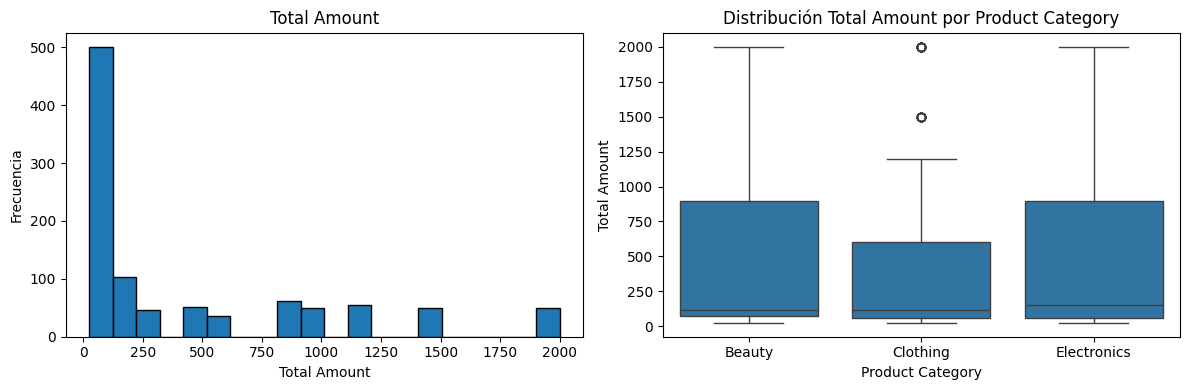

In [6]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
# Graficaré Total Amount
# Tamaño del lienzo (ancho x alto).
plt.figure(figsize=(12, 4))

# Primer gráfico
plt.subplot(1, 2, 1)
# Creo histograma de Quantity
plt.hist(df['Total Amount'], bins=20, edgecolor='black')
plt.xlabel('Total Amount')
plt.ylabel('Frecuencia')
plt.title('Total Amount')
#plt.show()

# Segundo gráfico
plt.subplot(1, 2, 2)

# Obtengo un Boxplot de Quantity por Product Category
sns.boxplot(x="Product Category", y="Total Amount", data=df)
plt.title("Distribución Total Amount por Product Category")



plt.tight_layout()
plt.show()

**Del Histograma "Total Amount":**

La distribución de "Total Amount" está fuertemente sesgada a la derecha. La mayoría de los clientes (alrededor de 500) gastan una cantidad baja, concentrada en el primer bin (aproximadamente entre 0 y 250).

La frecuencia de clientes disminuye drásticamente a medida que el monto total gastado aumenta. Hay muchos menos clientes que gastan grandes sumas.

Aunque la mayoría gasta poco, existen grupos más pequeños de clientes que gastan en rangos más altos

**Del Boxplot "Distribución Total Amount por Product Category":**

El gráfico compara la distribución de "Total Amount" para tres categorías de productos: "Beauty" (Belleza), "Clothing" (Ropa) y "Electronics" (Electrónica).

La mediana de "Total Amount" para "Beauty" es bastante baja, probablemente alrededor de 100-150, lo que indica que la mitad de las compras de belleza son de montos pequeños.

La caja (IQR) es relativamente grande, abarcando desde un valor muy bajo hasta alrededor de 850-900. La mediana está cerca del borde inferior de la caja, indicando un sesgo a la derecha.

La mediana de "Total Amount" para "Clothing" parece ser similar o incluso ligeramente más baja que la de "Beauty", quizás alrededor de 100.

La caja (IQR) es notablemente más pequeña que la de "Beauty", abarcando desde un valor muy bajo hasta aproximadamente 600-650. Esto sugiere que el 50% central de las compras de ropa está más concentrado en valores bajos a medios.

**Valores Atípicos:** Se observan al menos dos puntos individuales por encima del bigote superior (alrededor de 1500 y 2000), lo que indica valores atípicos de "Total Amount" inusualmente altos para la categoría de ropa. El bigote superior llega a un valor mucho más bajo que en las otras categorías (alrededor de 1200).

Similar a "Beauty", la mediana de "Total Amount" para "Electronics" es baja, también alrededor de 100-150.

La caja es similar en tamaño y sesgo a la de "Beauty", abarcando desde un valor bajo hasta alrededor de 850-900.

**Crea gráficos de líneas para mostrar las tendencias de ventas a lo largo del tiempo.**

In [7]:
# Reviso los tipos de datos de mi DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
# Cambio el tipo de datos de la columna Date de mi DF
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Reviso nuevamente los tipos de datos de mi DF para confirmar el cambio de tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [10]:
# Agrego la columna AnnoVenta a mi DF
df['AnnoVenta'] = df['Date'].dt.year

In [11]:
# Reviso la existencia de mi nueva columna
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,AnnoVenta
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023


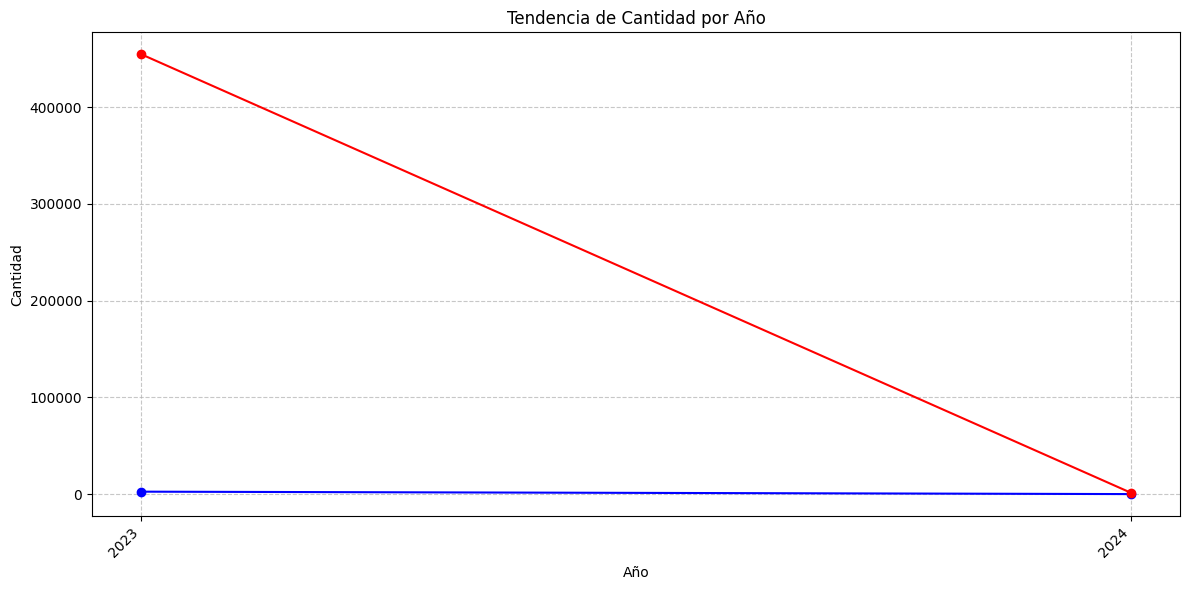

In [12]:
# Creo un DF para seleccionar las columnas que deseo graficar.
data= df[["AnnoVenta","Quantity","Total Amount"]]

# Creo un DF para ordenar los registros por la columna AnnoVenta.
df_sort = data.sort_values(by='AnnoVenta')


# Creo un DF para agrupar los registros por la columna AnnoVenta, para sumar los valores de Quantity y Total Amount.
tendenciaQ = df_sort.groupby('AnnoVenta')['Quantity'].sum().reset_index()
tendenciaT = df_sort.groupby('AnnoVenta')['Total Amount'].sum().reset_index()

# 3. Creo un gráfico de línea para ver tendencia
plt.figure(figsize=(12, 6)) # ajusto el tamaño de la gráfica
plt.plot(tendenciaQ['AnnoVenta'], tendenciaQ['Quantity'], marker='o', linestyle='-', color='blue')
plt.plot(tendenciaT['AnnoVenta'], tendenciaT['Total Amount'], marker='o', linestyle='-', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Tendencia de Cantidad por Año')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(tendenciaQ['AnnoVenta'].unique(), rotation=45, ha='right')


# Adjusto el layout para prevenir la sobreescritura de los 'labels'
plt.tight_layout()

plt.show()

**Del gráfico de "Tendencia de Cantidad por Año", podemos extraer las siguientes conclusiones:**

**Periodo de Tiempo Analizado:** El gráfico muestra datos para solo dos años: 2023 y 2024. Esto es una limitación importante, ya que una tendencia normalmente requiere más puntos de datos a lo largo del tiempo para ser robusta.

Línea roja con valores significativamente más altos. Línea azul con valores muy cercanos a cero o cero.

**Análisis de la Serie Roja:**

En 2023, la "Cantidad" de la serie roja es extremadamente alta, aproximadamente 440,000 unidades.

En 2024, la "Cantidad" de la serie roja cae drásticamente a un valor muy cercano a cero (parece ser exactamente cero o insignificante).

**Conclusión:** Esta serie muestra una caída masiva, casi una desaparición total, de la "Cantidad" entre 2023 y 2024. Esto podría indicar un cese de operaciones, un error en los datos, un cambio de metodología, o un evento catastrófico que afectó a la cantidad medida.

**Análisis de la Serie Azul:**

En 2023, la "Cantidad" de la serie azul es cero o muy cercana a cero.

En 2024, la "Cantidad" de la serie azul también es cero o muy cercana a cero.

**Conclusión:** La "Cantidad" de la serie azul se ha mantenido constante y en niveles insignificantes durante ambos años.

**Utiliza gráficos de dispersión para analizar la relación entre diferentes variables.**

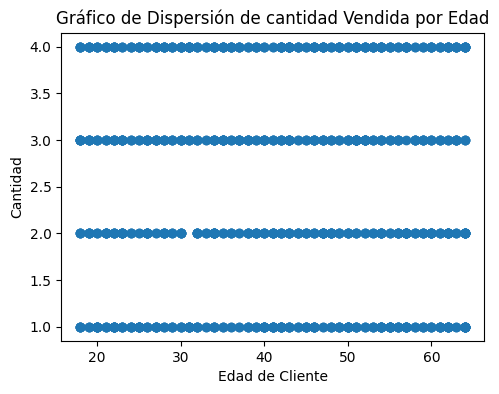

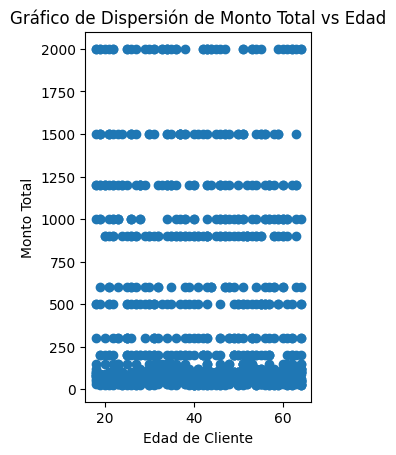

<Figure size 640x480 with 0 Axes>

In [13]:
# Utiliza histogramas y boxplots para visualizar la distribución de las variables numéricas clave.
# Graficaré Total Amount
# Tamaño del lienzo (ancho x alto).
plt.figure(figsize=(12, 4))

# Primer gráfico
plt.subplot(1, 2, 1)
# Creo el gráfico de dispersión que muestra la relación entre Age y Quantity
plt.scatter(df["Age"], df["Quantity"])
plt.title("Gráfico de Dispersión de cantidad Vendida por Edad")
plt.xlabel("Edad de Cliente")
plt.ylabel("Cantidad")
plt.show()
#plt.show()

# Segundo gráfico
plt.subplot(1, 2, 2)

# Creo el gráfico de dispersión que muestra la relación entre Age y Total Amount
plt.scatter(df["Age"], df["Total Amount"])
plt.title("Gráfico de Dispersión de Monto Total vs Edad")
plt.xlabel("Edad de Cliente")
plt.ylabel("Monto Total")
plt.show()


plt.tight_layout()
plt.show()

**Análisis de los dos gráficos de dispersión**

**Gráfico Superior: "Gráfico de Dispersión de Cantidad Vendida por Edad"**

* **Valores Discretos de Cantidad:** La variable "Cantidad" (en el eje Y) solo toma un número muy limitado de valores discretos: 1, 2, 3 y 4. Esto sugiere que "Cantidad" podría ser el número de artículos comprados o una categoría de cantidad de compra, más que una métrica continua.

* **Distribución de Edad:** La "Edad de Cliente" (en el eje X) abarca un rango amplio, aproximadamente desde los 18 hasta los 65 años. Los puntos están distribuidos a lo largo de todo este rango de edad para cada uno de los niveles de "Cantidad".

Se aprecia que la edad del cliente no parece ser un factor determinante en la cantidad de artículos que compra (si "Cantidad" representa el número de artículos).

**Gráfico Inferior: "Gráfico de Dispersión de Monto Total vs Edad"**

* **Valores Discretos/Agrupados de Monto Total:** Similar al gráfico superior, aunque "Monto Total" (en el eje Y) es una variable continua, los puntos se agrupan en bandas horizontales distintas (alrededor de 0-250, 500, 750, 1000, 1250, 1500, 1750, 2000).

* **Distribución de Edad:** La "Edad de Cliente" (en el eje X) nuevamente abarca un rango similar, aproximadamente desde los 18 hasta los 65 años.



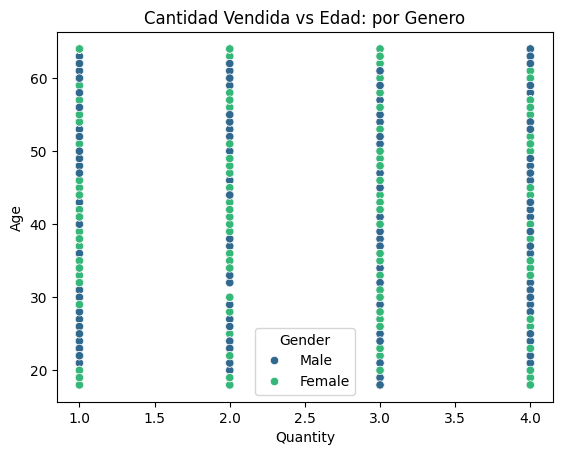

In [14]:
# Creo un gráfico de dispersión de Quantity vs Age
sns.scatterplot(data=df, x='Quantity', y='Age', hue='Gender', palette='viridis')
plt.xlabel('Quantity')
plt.ylabel('Age')
plt.title('Cantidad Vendida vs Edad: por Genero')
plt.show()

**El gráfico de dispersión "Cantidad Vendida vs Edad: por Genero", presents las siguientes conclusiones:**

**Variables en los Ejes:**

* **Eje X (Quantity - Cantidad):** Al igual que en gráficos anteriores, la variable 'Quantity' toma solo valores discretos: 1, 2, 3 y 4. Esto refuerza la idea de que 'Quantity' representa el número de ítems o categorías de cantidad fija.
* **Eje Y (Age - Edad):** La edad de los clientes se distribuye a lo largo de un rango similar al observado previamente, aproximadamente desde los 18 hasta los 65 años.

**Distribución de Datos por Cantidad:**

Para cada valor de 'Quantity' (1, 2, 3 y 4), hay una dispersión de puntos que cubre casi todo el rango de edad. Esto significa que clientes de todas las edades (desde los más jóvenes hasta los más mayores) compran cantidades de 1, 2, 3 y 4.

**Análisis por Género (Color de los Puntos):**

* Los puntos azules representan a "Male" (Masculino).
* Los puntos verdes representan a "Female" (Femenino).

En resumen, para cada nivel de 'Quantity' y a lo largo de todas las edades, se observa una mezcla intercalada de puntos azules y verdes. Esto indica que tanto hombres como mujeres compran cantidades de 1, 2, 3 y 4, y que esta distribución por género no varía significativamente con la edad.



**Combina histogramas y boxplots para visualizar la distribución de las ventas y detectar valores atípicos.**

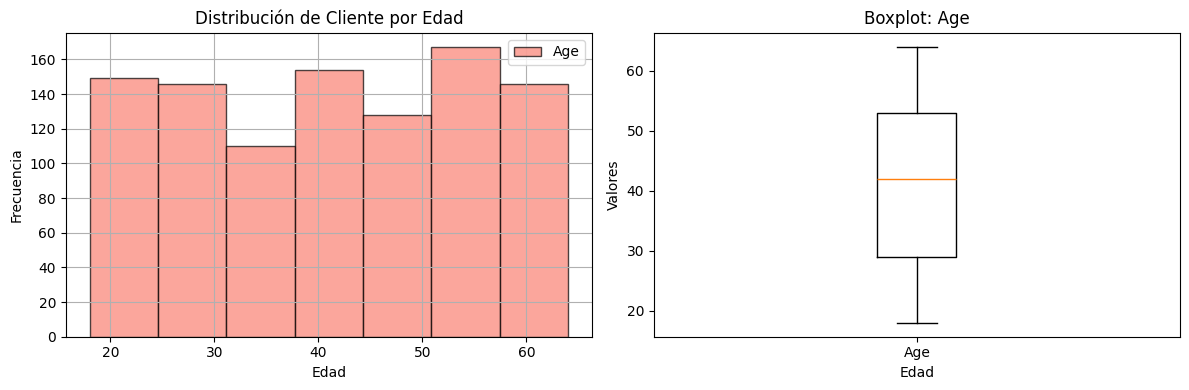

In [15]:
# Tamaño del lienzo (ancho x alto).
plt.figure(figsize=(12, 4))

# Primer gráfico
plt.subplot(1, 2, 1)
plt.hist(df["Age"], bins=7, color=['salmon'], edgecolor='black', alpha=0.7, label=['Age'])
plt.title("Distribución de Cliente por Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
#plt.show()

# Segundo gráfico
plt.subplot(1, 2, 2)
plt.boxplot(df["Age"], tick_labels=['Age'])
plt.title("Boxplot: Age")
plt.xlabel("Edad")
plt.ylabel("Valores")


plt.tight_layout()
plt.show()

**Del Histograma "Distribución de Cliente por Edad":**

Rango de Edad Principal: La mayoría de los clientes se encuentran en un rango de edad que va aproximadamente desde los 18-20 años hasta los 60-65 años.
Picos de Frecuencia: Se observan picos de frecuencia (mayor número de clientes) en los siguientes rangos de edad aproximados:
* Alrededor de los 20-25 años.
* Alrededor de los 40-45 años.
* Alrededor de los 55-60 años.


**Del Boxplot "Boxplot: Age":**

Mediana: La línea naranja dentro de la caja indica la mediana de la edad, que parece estar alrededor de los 43-45 años. Esto significa que el 50% de los clientes tienen una edad igual o inferior a este valor.
Rango Intercuartílico (IQR): La caja misma representa el IQR, que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3).
* Q1 (borde inferior de la caja) está aproximadamente en 29-30 años.
* Q3 (borde superior de la caja) está aproximadamente en 53-54 años.

Esto significa que el 50% central de los clientes tiene entre 29-30 y 53-54 años.

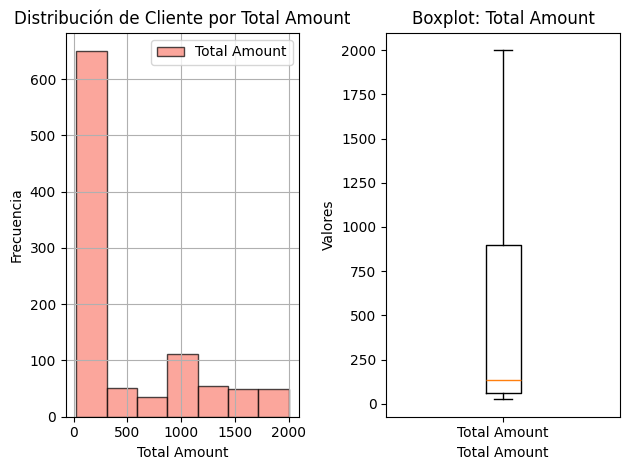

In [16]:
# Primer gráfico
plt.subplot(1, 2, 1)
plt.hist(df["Total Amount"], bins=7, color=['salmon'], edgecolor='black', alpha=0.7, label=['Total Amount'])
plt.title("Distribución de Cliente por Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
#plt.show()

# Segundo gráfico
plt.subplot(1, 2, 2)
plt.boxplot(df["Total Amount"], tick_labels=['Total Amount'])
plt.title("Boxplot: Total Amount")
plt.xlabel("Total Amount")
plt.ylabel("Valores")


plt.tight_layout()
plt.show()

**Del Histograma "Distribución de Cliente por Total Amount":**

Fuerte Sesgo a la Derecha: La distribución del "Total Amount" está fuertemente sesgada a la derecha. La gran mayoría de los clientes tienen un monto total bajo, concentrándose en el primer bin (aproximadamente de 0 a 250). Hay un pico muy alto de frecuencia en este rango

**Del Boxplot "Boxplot: Total Amount":**

Mediana Muy Baja: La línea naranja que representa la mediana está muy cerca de la parte inferior de la caja, lo que confirma el fuerte sesgo a la derecha. La mediana del "Total Amount" es muy baja, probablemente alrededor de 100-150. Esto significa que al menos el 50% de los clientes tienen un monto total igual o inferior a este valor.

Rango Intercuartílico (IQR) Asimétrico:
* Q1 (borde inferior de la caja) está muy cerca de la mediana, lo que significa que el 25% inferior de los datos está muy comprimido en valores bajos. Parece estar alrededor de 50-70.
* Q3 (borde superior de la caja) se encuentra en un valor mucho más alto, aproximadamente 850-900.

Esto indica que el 50% central de los clientes tiene un "Total Amount" que va desde valores muy bajos hasta alrededor de 850-900. La asimetría de la caja es una clara indicación del sesgo a la derecha.

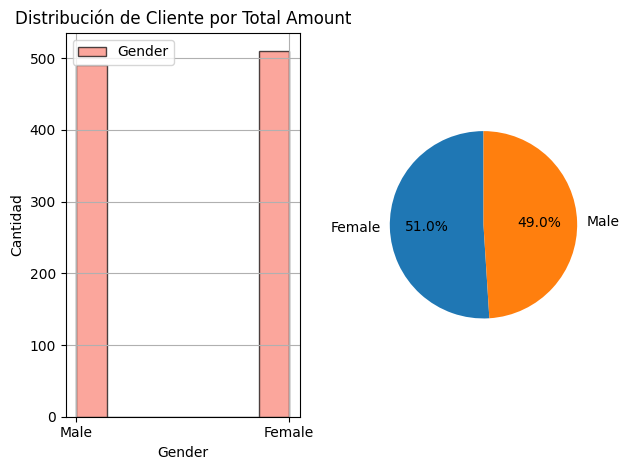

In [17]:
# Primer gráfico
plt.subplot(1, 2, 1)
plt.hist(df["Gender"], bins=7, color=['salmon'], edgecolor='black', alpha=0.7, label=['Gender'])
plt.title("Distribución de Cliente por Total Amount")
plt.xlabel("Gender")
plt.ylabel("Cantidad")
plt.legend()
plt.grid(True)
#plt.show()

# Grafico de torta para obtenr porcentaje por Gender
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts().values
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

**Del Gráfico de Barras:**

Representación por Barras: Hay dos barras, una para "Male" (Masculino) y otra para "Female" (Femenino), lo que indica que se está analizando una variable categórica binaria.

Conteo de Clientes por Género:
* La barra para "Male" alcanza aproximadamente los 490-500 clientes.
* La barra para "Female" alcanza un poco más de 500 clientes, alrededor de 510-520.

Balance Cercano: Visualmente, las alturas de las barras son muy similares, lo que sugiere un número casi igual de clientes masculinos y femeninos.


**Del Gráfico de Torta**:

Distribución Porcentual: Este gráfico muestra la proporción de cada género en el total de clientes.

* "Female" representa el 51.0% del total de clientes.
* "Male" representa el 49.0% del total de clientes.

Equilibrio de Género: Confirma numéricamente lo que se observa en el gráfico de barras: la distribución de género entre los clientes es muy equilibrada, con una ligera predominancia de clientes femeninos.